In [6]:
# packages for data-analysis and ML-module
import pandas as pd
import numpy as np
from sklearn import svm

# packages for data-visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

In [7]:
accident_data = pd.read_csv(r'C:\Users\Bob\Desktop\accident.csv')
print(accident_data.head())

  Series_reference  Period            Type  Data_value   Lower_CI   Upper_CI  \
0            W_A11  Feb-00  Moving average   59.666667  50.925823  68.407510   
1            W_A11  Mar-01  Moving average   60.000000  51.234775  68.765225   
2            W_A11  Apr-02  Moving average   59.000000  50.308125  67.691875   
3            W_A11  May-03  Moving average   59.000000  50.308125  67.691875   
4            W_A11  Jun-04  Moving average   61.333333  52.471252  70.195415   

      Units Indicator  
0  Injuries    Number  
1  Injuries    Number  
2  Injuries    Number  
3  Injuries    Number  
4  Injuries    Number  


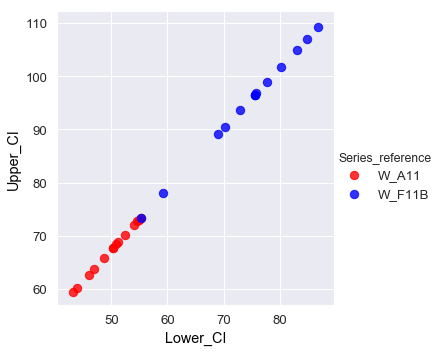

In [8]:
sns.set_style("darkgrid", {"axes.labelcolor": "black"})
fig = sns.lmplot(x='Lower_CI',y='Upper_CI',data=accident_data,hue='Series_reference',palette=['red','blue'],fit_reg=False,scatter_kws={'s':70})

In [10]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [28]:
# Transform it to a long format
#df=accident_data.unstack().reset_index()
#df.columns=["Data_value","Lower_CI","Upper_CI"]

In [29]:
# groupby() is awaiting for its trial
accident_data_1 = accident_data.query('Series_reference=="W_A11"')
accident_data_2 = accident_data.query('Series_reference=="W_F11B"')

Text(0.5,0,'Upper_CI')

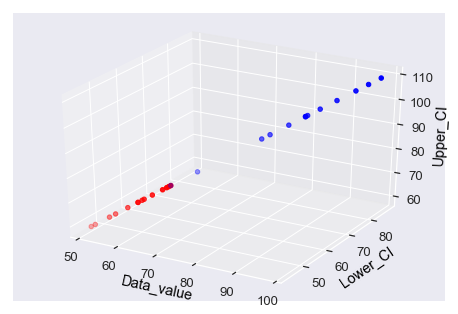

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(accident_data_1['Data_value'], accident_data_1['Lower_CI'], accident_data_1['Upper_CI'], color='Red')
ax.scatter(accident_data_2['Data_value'], accident_data_2['Lower_CI'], accident_data_2['Upper_CI'], color='Blue')
ax.set_xlabel('Data_value')
ax.set_ylabel('Lower_CI')
ax.set_zlabel('Upper_CI')

We can see as above there's actually overlap between two sets of data after the implementation of 'Kernel-Trick'(demension-increase)

In [1]:
type_label = np.where(accident_data['Series_reference']=='W_A11',0,1)
# display all applicable features
sample_feature = accident_data.columns.values[1:].tolist()
# select particular features that are likely to differentiate dataset for utmost extent
selected_feature_dataset2 = accident_data[['Data_value','Lower_CI']].values
print(sample_feature)
print(selected_feature_dataset2)

NameError: name 'np' is not defined

In [32]:
model = svm.SVC(kernel='linear',C=2**10)
model.fit(selected_feature_dataset2,type_label)

SVC(C=1024, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

hyperplane display

In [38]:
# slpoe of hyperlane

w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,70)
yy = a*xx - (model.intercept_[0])/w[1]

[[64.         54.94731413]
 [64.33333333 55.25710337]
 [64.33333333 55.25710337]
 [68.66666667 59.28974158]]


In [40]:
sv_all = model.support_vectors_
print(sv_all)

[[64.         54.94731413]
 [64.33333333 55.25710337]
 [64.33333333 55.25710337]
 [68.66666667 59.28974158]]


In [ ]:
"""plot the margin"""
# lower margin
b = model.support_vectors_[0]
yy_down = a*xx + (b[1]-a*b[0])
# upper margin
b = model.support_vectors_[-1]
yy_up = a*xx + (b[1]-a*b[0])

[[64.         54.94731413]
 [64.33333333 55.25710337]
 [64.33333333 55.25710337]
 [68.66666667 59.28974158]]


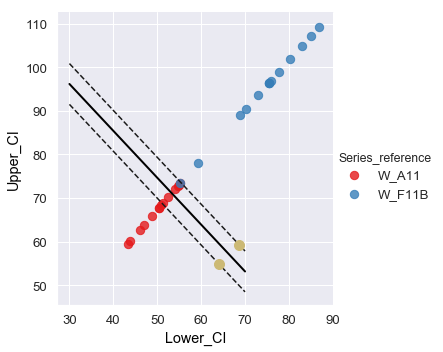

In [17]:
sns.set_style("darkgrid", {"axes.labelcolor": "black"})
fig = sns.lmplot(x='Lower_CI',y='Upper_CI',data=accident_data,hue='Series_reference',palette='Set1',fit_reg=False,scatter_kws={'s':70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
lower_sv = model.support_vectors_[0]
upper_sv = model.support_vectors_[-1]
plt.plot(lower_sv[0],lower_sv[1],'yo',markersize=10)
plt.plot(upper_sv[0],upper_sv[1],'yo',markersize=10)

In [41]:
type_label = np.where(accident_data['Series_reference']=='W_A11',0,1)
# select particular features that are likely to differentiate dataset for utmost extent
selected_feature_dataset3 = accident_data[['Data_value','Lower_CI','Upper_CI']].values
print(sample_feature)
print(selected_feature_dataset3)


In [ ]:
model = svm.SVC(kernel='linear',C=2**-5)
model.fit(selected_feature_dataset3,type_label)

In [46]:
sv_all3 = model.support_vectors_
print(sv_all3)